In [35]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [36]:
weather = pd.read_csv('Capstone1_WeatherData1.csv')

In [37]:
flight= pd.read_csv('Capstone 1 - Preparing Data.csv',low_memory=False,dtype=str)

In [38]:
weather[['NAME_OF_AIRPORT','Corrected_Timestamp']].head()

,NAME_OF_AIRPORT,Corrected_Timestamp
0,ATL,2014-12-31 23:00:00
1,ATL,2015-01-01 00:00:00
2,ATL,2015-01-01 01:00:00
3,ATL,2015-01-01 02:00:00
4,ATL,2015-01-01 03:00:00


In [39]:
flight[['ORIGIN_AIRPORT', 'SCHEDULED_DEPARTURE_DT']].head()

,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE_DT
0,SFO,2015-01-01 00:30:00
1,LAS,2015-01-01 00:30:00
2,DEN,2015-01-01 00:30:00
3,SFO,2015-01-01 00:48:00
4,LAS,2015-01-01 01:03:00


In [40]:
flight['KEY']=flight.SCHEDULED_DEPARTURE_DT.str.slice(0,13)+':00:00' +flight.ORIGIN_AIRPORT
flight['KEY'].head()

0    2015-01-01 00:00:00SFO
1    2015-01-01 00:00:00LAS
2    2015-01-01 00:00:00DEN
3    2015-01-01 00:00:00SFO
4    2015-01-01 01:00:00LAS
Name: KEY, dtype: object

In [41]:
weather['KEY'] = weather['Corrected_Timestamp']+ weather['NAME_OF_AIRPORT']
weather['KEY'].head()

0    2014-12-31 23:00:00ATL
1    2015-01-01 00:00:00ATL
2    2015-01-01 01:00:00ATL
3    2015-01-01 02:00:00ATL
4    2015-01-01 03:00:00ATL
Name: KEY, dtype: object

In [42]:
Flight_merged =pd.merge(flight,weather[['apparentTemperature','cloudCover','dewPoint', 'humidity', 'icon',
       'precipAccumulation', 'precipIntensity', 'precipProbability',
       'precipType', 'pressure', 'summary', 'temperature',
       'visibility', 'windBearing', 'windGust', 'windSpeed']], left_on=flight.KEY,
        right_on=weather.KEY, how='left')

In [43]:
Flight_merged= Flight_merged[['DATE', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT','apparentTemperature',
       'cloudCover', 'dewPoint', 'humidity', 'icon', 'precipAccumulation',
       'precipIntensity', 'precipProbability', 'precipType', 'pressure',
       'summary', 'temperature', 'visibility', 'windBearing', 'windGust',
       'windSpeed',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_DEPARTURE_DT',
       'DEPARTURE_TIME', 'DEPARTURE_TIME_DT', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_OFF_DT', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'WHEELS_ON_DT', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_ARRIVAL_DT', 'ARRIVAL_TIME',
       'ARRIVAL_TIME_DT', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [44]:
Flight_merged.shape

(533178, 53)

In [45]:
Flight_merged.columns=['DATE', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT','ORG_apparentTemperature',
       'ORG_cloudCover', 'ORG_dewPoint', 'ORG_humidity', 'ORG_icon', 'ORG_precipAccumulation',
       'ORG_precipIntensity', 'ORG_precipProbability', 'ORG_precipType', 'ORG_pressure',
       'ORG_summary', 'ORG_temperature', 'ORG_visibility', 'ORG_windBearing', 'ORG_windGust',
       'ORG_windSpeed',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_DEPARTURE_DT',
       'DEPARTURE_TIME', 'DEPARTURE_TIME_DT', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_OFF_DT', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'WHEELS_ON_DT', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_ARRIVAL_DT', 'ARRIVAL_TIME',
       'ARRIVAL_TIME_DT', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

In [46]:
Flight_merged['KEY_AR'] =flight.ARRIVAL_TIME_DT.str.slice(0,13)+':00:00' +flight.ORIGIN_AIRPORT
Flight_merged['KEY_AR'].head()

0    2015-01-01 05:00:00SFO
1    2015-01-01 07:00:00LAS
2    2015-01-01 05:00:00DEN
3    2015-01-01 06:00:00SFO
4    2015-01-01 05:00:00LAS
Name: KEY_AR, dtype: object

In [48]:
Flight_merged_final =pd.merge(Flight_merged,weather[['apparentTemperature','cloudCover','dewPoint', 'humidity', 'icon',
       'precipAccumulation', 'precipIntensity', 'precipProbability',
       'precipType', 'pressure', 'summary', 'temperature',
       'visibility', 'windBearing', 'windGust', 'windSpeed']], left_on=Flight_merged.KEY_AR,
        right_on=weather.KEY, how='left')

In [49]:
Flight_merged_final.shape

(533183, 71)

In [50]:
Flight_merged_final=Flight_merged_final[['DATE', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'ORG_apparentTemperature', 'ORG_cloudCover', 'ORG_dewPoint',
       'ORG_humidity', 'ORG_icon', 'ORG_precipAccumulation',
       'ORG_precipIntensity', 'ORG_precipProbability', 'ORG_precipType',
       'ORG_pressure', 'ORG_summary', 'ORG_temperature', 'ORG_visibility',
       'ORG_windBearing', 'ORG_windGust', 'ORG_windSpeed',
       'DESTINATION_AIRPORT','apparentTemperature',
       'cloudCover', 'dewPoint', 'humidity', 'icon', 'precipAccumulation',
       'precipIntensity', 'precipProbability', 'precipType', 'pressure',
       'summary', 'temperature', 'visibility', 'windBearing', 'windGust',
       'windSpeed', 'SCHEDULED_DEPARTURE', 'SCHEDULED_DEPARTURE_DT',
       'DEPARTURE_TIME', 'DEPARTURE_TIME_DT', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_OFF_DT', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'WHEELS_ON_DT', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_ARRIVAL_DT', 'ARRIVAL_TIME',
       'ARRIVAL_TIME_DT', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [51]:
Flight_merged_final.columns =['DATE', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'ORG_apparentTemperature', 'ORG_cloudCover', 'ORG_dewPoint',
       'ORG_humidity', 'ORG_icon', 'ORG_precipAccumulation',
       'ORG_precipIntensity', 'ORG_precipProbability', 'ORG_precipType',
       'ORG_pressure', 'ORG_summary', 'ORG_temperature', 'ORG_visibility',
       'ORG_windBearing', 'ORG_windGust', 'ORG_windSpeed',
       'DESTINATION_AIRPORT','DEST_apparentTemperature',
       'DEST_cloudCover', 'DEST_dewPoint', 'DEST_humidity', 'DEST_icon', 'DEST_precipAccumulation',
       'DEST_precipIntensity', 'DEST_precipProbability', 'DEST_precipType', 'DEST_pressure',
       'DEST_summary', 'DEST_temperature', 'DEST_visibility', 'DEST_windBearing', 'DEST_windGust',
       'DEST_windSpeed', 'SCHEDULED_DEPARTURE', 'SCHEDULED_DEPARTURE_DT',
       'DEPARTURE_TIME', 'DEPARTURE_TIME_DT', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_OFF_DT', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'WHEELS_ON_DT', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_ARRIVAL_DT', 'ARRIVAL_TIME',
       'ARRIVAL_TIME_DT', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

In [53]:
Flight_merged_final.to_csv('Capstone 1 - Preparing Data(W).csv')

In [19]:
Flight_merged_final

,DATE,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,ORG_apparentTemperature,ORG_cloudCover,ORG_dewPoint,ORG_humidity,ORG_icon,ORG_precipAccumulation,ORG_precipIntensity,ORG_precipProbability,ORG_precipType,ORG_pressure,ORG_summary,ORG_temperature,ORG_visibility,ORG_windBearing,ORG_windGust,ORG_windSpeed,DESTINATION_AIRPORT,DEST_apparentTemperature,DEST_cloudCover,DEST_dewPoint,DEST_humidity,DEST_icon,DEST_precipAccumulation,DEST_precipIntensity,DEST_precipProbability,DEST_precipType,DEST_pressure,DEST_summary,DEST_temperature,DEST_visibility,DEST_windBearing,DEST_windGust,DEST_windSpeed,SCHEDULED_DEPARTURE,SCHEDULED_DEPARTURE_DT,DEPARTURE_TIME,DEPARTURE_TIME_DT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_OFF_DT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,WHEELS_ON_DT,TAXI_IN,SCHEDULED_ARRIVAL,SCHEDULED_ARRIVAL_DT,ARRIVAL_TIME,ARRIVAL_TIME_DT,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01 00:00:00,2015,1,1,4,AA,1112,N3LAAA,SFO,45.08,0.00,22.57,0.41,clear-night,NaN,0.0000,0.00,NaN,1018.37,Clear,45.08,10.00,66.0,4.07,0.58,DFW,43.27,0.00,21.28,0.41,clear-night,NaN,0.0000,0.00,NaN,1018.58,Clear,43.27,10.00,53.0,4.99,1.25,0030,2015-01-01 00:30:00,0019,2015-01-01 00:19:00,-11.0,17.0,0036,2015-01-01 00:36:00,195.0,193.0,173.0,1464,05:29,2015-01-01 05:29:00,3.0,05:45,2015-01-01 05:45:00,05:32,2015-01-01 05:45:00,-13.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00,2015,1,1,4,UA,1197,N78448,SFO,45.08,0.00,22.57,0.41,clear-night,NaN,0.0000,0.00,NaN,1018.37,Clear,45.08,10.00,66.0,4.07,0.58,IAH,30.79,0.14,15.55,0.53,clear-day,NaN,0.0000,0.00,NaN,1021.08,Clear,30.79,10.00,250.0,5.26,0.43,0048,2015-01-01 00:48:00,0042,2015-01-01 00:42:00,-6.0,11.0,0053,2015-01-01 00:53:00,218.0,217.0,199.0,1635,06:12,2015-01-01 06:12:00,7.0,06:26,2015-01-01 06:26:00,06:19,2015-01-01 06:26:00,-7.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 00:00:00,2015,1,1,4,NK,200,N530NK,IAH,41.84,1.00,36.87,0.82,cloudy,NaN,0.0007,0.22,rain,1024.24,Overcast,41.84,10.00,51.0,5.72,1.71,ORD,30.79,0.14,15.55,0.53,clear-day,NaN,0.0000,0.00,NaN,1021.08,Clear,30.79,10.00,250.0,5.26,0.43,0623,2015-01-01 06:23:00,0620,2015-01-01 06:20:00,-3.0,15.0,0635,2015-01-01 06:35:00,152.0,140.0,115.0,925,08:30,2015-01-01 08:30:00,10.0,08:55,2015-01-01 08:55:00,08:40,2015-01-01 08:55:00,-15.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2015-01-01 00:00:00,2015,1,1,4,DL,1173,N826DN,LAS,34.23,0.83,16.10,0.47,partly-cloudy-night,NaN,0.0000,0.00,NaN,1017.51,Mostly Cloudy,34.23,10.00,18.0,6.28,1.15,ATL,4.10,0.13,-1.94,0.75,clear-night,NaN,0.0000,0.00,NaN,1022.61,Clear,4.10,2.04,199.0,2.04,0.85,0030,2015-01-01 00:30:00,0033,2015-01-01 00:33:00,3.0,12.0,0045,2015-01-01 00:45:00,221.0,203.0,186.0,1747,06:51,2015-01-01 06:51:00,5.0,07:11,2015-01-01 07:11:00,06:56,2015-01-01 07:11:00,-15.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2015-01-01 00:00:00,2015,1,1,4,DL,2336,N958DN,DEN,6.92,0.00,-1.98,0.66,clear-night,NaN,0.0000,0.00,NaN,1025.03,Clear,6.92,4.54,187.0,3.00,0.96,ATL,43.10,0.00,21.90,0.43,clear-night,NaN,0.0000,0.00,NaN,1018.83,Clear,43.10,10.00,47.0,6.35,1.94,0030,2015-01-01 00:30:00,0024,2015-01-01 00:24:00,-6.0,12.0,0036,2015-01-01 00:36:00,173.0,149.0,133.0,1199,04:49,2015-01-01 04:49:00,4.0,05:23,2015-01-01 05:23:00,04:53,2015-01-01 05:23:00,-30.0,0,0,NaN,NaN,NaN,NaN,NaN
5,2015-01-01 00:00:00,2015,1,1,4,NK,214,N632NK,LAS,33.39,1.00,15.19,0.47,cloudy,NaN,0.0000,0.00,NaN,1017.46,Overcast,33.39,10.00,350.0,7.40,1.31,DFW,32.31,0.48,15.30,0.49,partly-cloudy-night,NaN,0.0000,0.00,NaN,1018.96,Partly Cloudy,32.31,10.00,30.0,8.23,2.63,0103,2015-01-01 01:03:00,0102,2015-01-01 01:02:00,-1.0,13.0,0115,2015-01-01 01:15:00,147.0,147.0,128.0,1055,05:23,2015-01-01 05:23:00,6.0,05:30,2015-01-01 05:30:00,05:29,2015-01-01 05:30:00,-1.0,0,0,NaN,NaN,NaN,NaN,NaN
6,2015-01-01 00:00:00,2015,1,1,4,NK,298,N514NK,LAS,33.39,1.00,15.19,0.47,cloudy,NaN,0.0000,0.00,NaN,1017.46,Overcast,33.39,10.00,350.0,7.40,1.31,IAH,38.92,0.00,23.77,0.54,clear

Text(0.5, 1.0, 'Wind Speed')

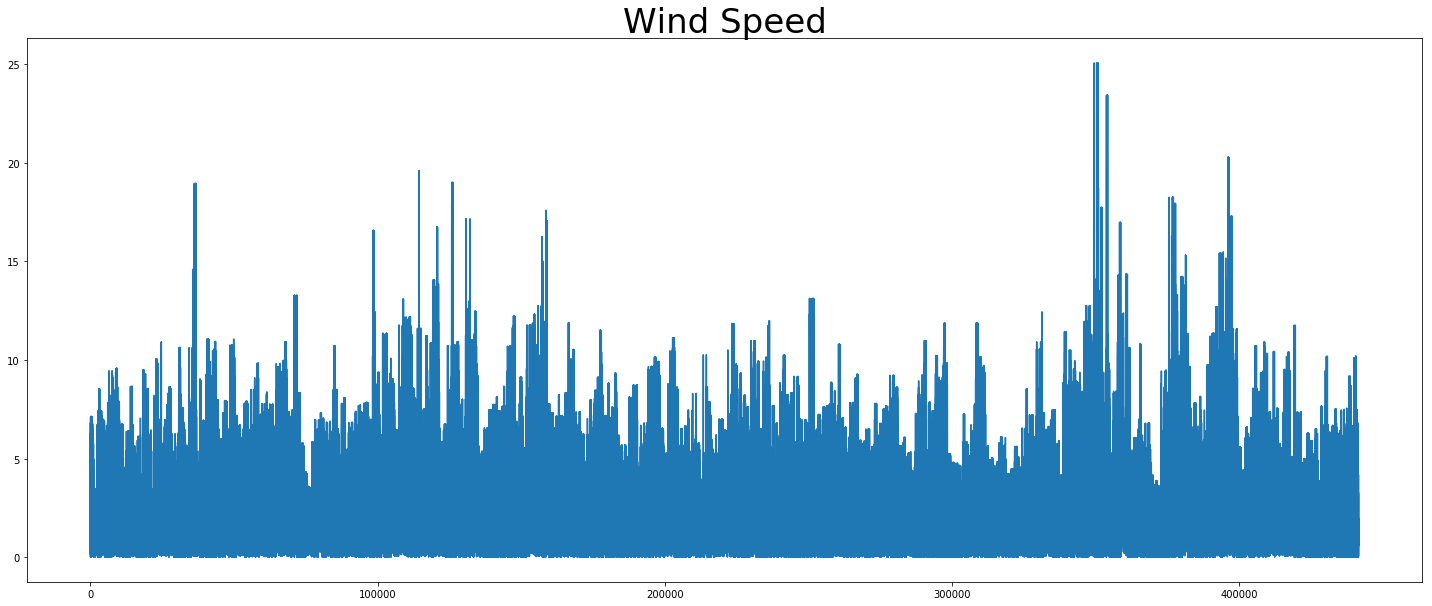

In [22]:

plt.figure(figsize=(25,10))
Flight_merged_final.ORG_windSpeed.plot()
plt.title('Wind Speed',size=34)
